# Customer Segmentation with K-Means Clustering

### Project Overview
This project applies the **K-Means clustering algorithm** to segment a synthetic customer dataset. The goal is to identify distinct customer groups based on their purchasing behavior. This segmentation is a core task in marketing analytics, allowing businesses to create highly targeted strategies and improve customer relationship management.

### Dataset
The model is applied to a synthetic dataset that simulates customer behavior with features like `spending`, `purchase frequency`, and `age`. This dataset allows for the demonstration of unsupervised learning techniques to uncover hidden patterns without pre-existing labels.

### Methodology
1.  **Data Generation and Preprocessing:** A synthetic dataset is created to represent customer data. Key features are selected and then scaled using a `StandardScaler` to ensure all features contribute equally to the clustering process.
2.  **Optimal Cluster Selection:** The **Elbow Method** is used to determine the optimal number of clusters (K). This visual technique helps identify the point where adding more clusters no longer significantly reduces the within-cluster sum of squares.
3.  **K-Means Clustering:** The K-Means algorithm is applied to the scaled data with the optimal number of clusters determined in the previous step.
4.  **Cluster Analysis:** The resulting clusters are analyzed by examining the mean values of the original features. This provides actionable insights into the unique characteristics of each customer segment.

### Concluded Results
The project successfully segments the customer base into distinct groups. The analysis of these clusters reveals valuable patterns, such as a "High-Value" segment with high spending and a "Low-Engagement" segment with infrequent purchases. This project demonstrates proficiency in unsupervised learning, data preprocessing, and the ability to derive actionable insights from data.

### Technologies Used
- Python
- Scikit-learn
- Pandas
- NumPy
- Matplotlib
- Jupyter Notebook

Generating synthetic customer data...
Data head:
     spending  purchase_frequency        age
0  899.014246            7.798711  22.598574
1  708.520710            6.849267  26.843851
2  629.537708            5.119261  27.075801
3  804.605971            3.706126  25.536308
4  679.753988            6.396447  16.063853
Scaling data...
Determining optimal number of clusters using the Elbow Method...


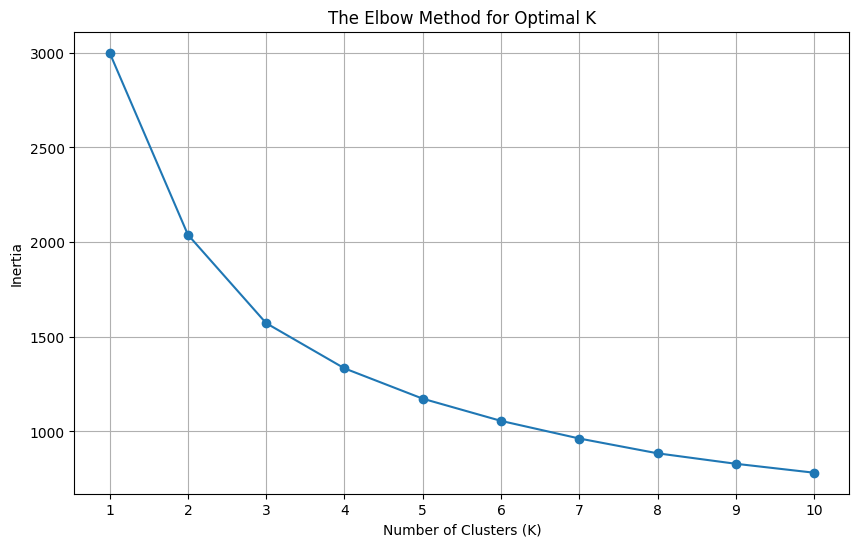


Applying K-Means with optimal K = 3...
First 5 rows with new cluster labels:
     spending  purchase_frequency        age  Cluster
0  899.014246            7.798711  22.598574        0
1  708.520710            6.849267  26.843851        0
2  629.537708            5.119261  27.075801        1
3  804.605971            3.706126  25.536308        1
4  679.753988            6.396447  16.063853        0

Analyzing the characteristics of each cluster...
           spending                          purchase_frequency            \
               mean         min          max               mean       min   
Cluster                                                                     
0        881.340524  322.575544  1905.819447           7.273624  3.225016   
1        506.912947   22.836202  1044.033833           4.019896  0.001189   
2        468.077926    5.671100   913.008058           4.856633  0.406465   

                          age                       Count  
               max       

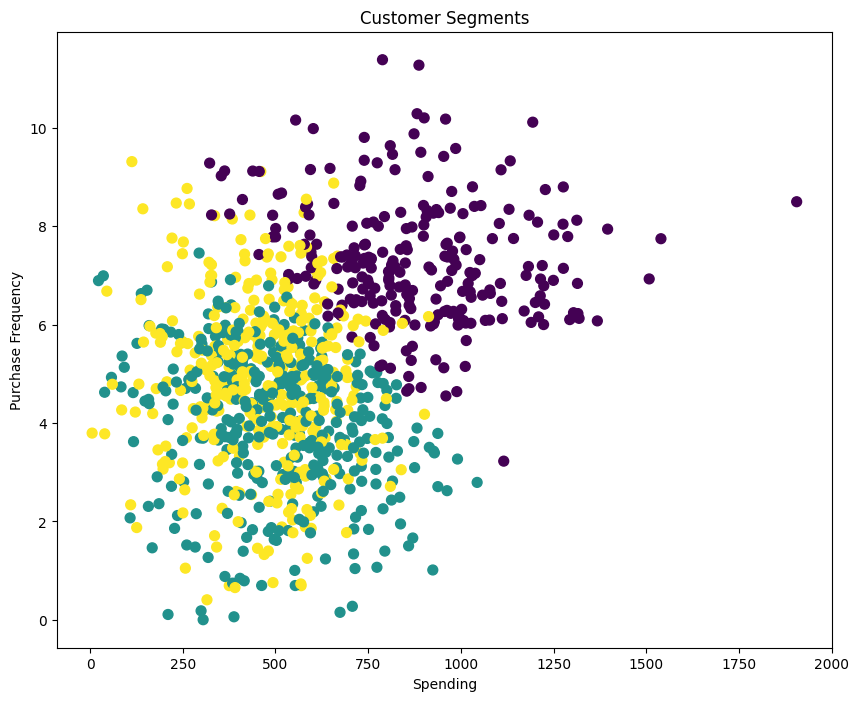

In [1]:
#  Customer Segmentation with K-Means Clustering

# --- Section 1: Setup and Data Generation ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("Generating synthetic customer data...")

# Generate synthetic customer data
np.random.seed(42)
data = {
    'spending': np.random.normal(500, 200, 1000),
    'purchase_frequency': np.random.normal(5, 2, 1000),
    'age': np.random.normal(35, 10, 1000)
}
df = pd.DataFrame(data)

# Adjust data to create clear clusters
df['spending'] = np.where(df['purchase_frequency'] > 6, df['spending'] * 1.5, df['spending'])
df['age'] = np.where(df['spending'] > 700, df['age'] * 0.8, df['age'])

# Ensure no negative values
df = df.abs()

print("Data head:")
print(df.head())

# --- Section 2: Data Preprocessing and Optimal K Selection (Elbow Method) ---

print("Scaling data...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['spending', 'purchase_frequency', 'age']])

print("Determining optimal number of clusters using the Elbow Method...")
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('The Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, step=1))
plt.grid(True)
plt.show()

# --- Section 3: Applying K-Means Clustering ---

# Assuming the elbow method suggests K=3 or K=4, let's choose K=3 for this example
optimal_k = 3
print(f"\nApplying K-Means with optimal K = {optimal_k}...")

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("First 5 rows with new cluster labels:")
print(df.head())

# --- Section 4: Cluster Analysis ---

print("\nAnalyzing the characteristics of each cluster...")
cluster_analysis = df.groupby('Cluster').agg({
    'spending': ['mean', 'min', 'max'],
    'purchase_frequency': ['mean', 'min', 'max'],
    'age': ['mean', 'min', 'max'],
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Count'})
print(cluster_analysis)

print("\nVisualization of Clusters (2D projection):\nThis is a 2D projection for visualization. The actual clustering is done in a 3D space.")
plt.figure(figsize=(10, 8))
plt.scatter(df['spending'], df['purchase_frequency'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segments')
plt.xlabel('Spending')
plt.ylabel('Purchase Frequency')
plt.show()